In [24]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [25]:
def getFiles(PATH, ext = '.jpg'):
    _files = []
    for root, dirs, files in os.walk(PATH):
        for fichero in files:
            name, extension = os.path.splitext(fichero)
            if extension == ext:
                _files.append(os.path.join(PATH,fichero))
    return _files

In [26]:
ficheros = getFiles('.//..//..//MSCOCO//train2014')[0:1000]

In [29]:
VLAD_DESCRIPTORS = np.load('vlad_descriptors//vlad_1.npy')

In [34]:
VLAD_DESCRIPTORS = VLAD_DESCRIPTORS.reshape(1000,-1)

In [35]:
pca = PCA(n_components=100)
pca.fit(VLAD_DESCRIPTORS)
numpy_descriptors_pca = pca.transform(VLAD_DESCRIPTORS)

In [36]:
nbrs = NearestNeighbors(n_neighbors=10, algorithm='brute',metric='cosine').fit(numpy_descriptors_pca)

In [55]:
distances, candidates = nbrs.kneighbors(numpy_descriptors_pca[350])

C:\Users\bldr1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


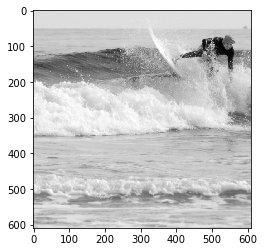

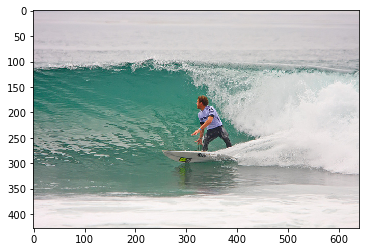

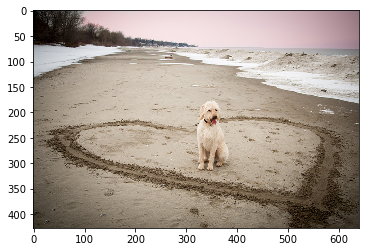

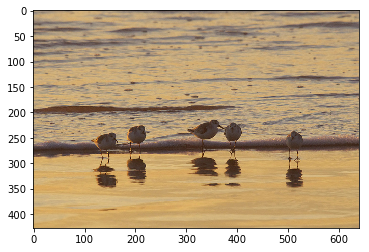

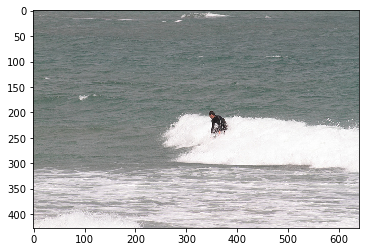

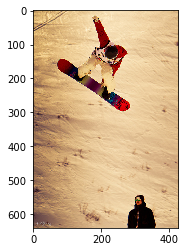

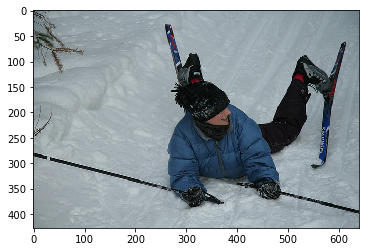

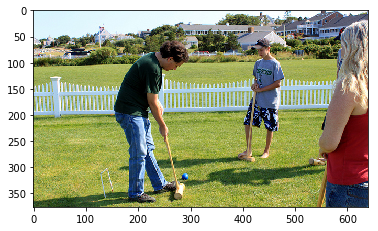

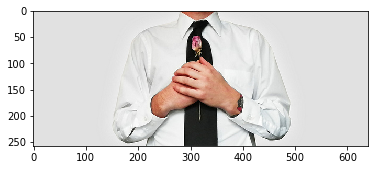

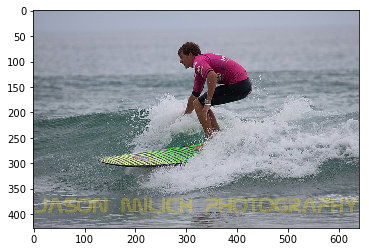

In [56]:
for candidate in candidates[0]:
    file = ficheros[candidate]
    img = plt.imread(file)
    plt.imshow(img)
    plt.show()